In [1]:
!pip install selenium

In [1]:
from PIL import Image
import io
import re 
import time
import pandas as pd
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.common.exceptions import NoSuchElementException
import warnings
warnings.filterwarnings("ignore")
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
import urllib.request
import os

In [2]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import time

driver = webdriver.Chrome()

driver.get("https://www.naukri.com/")

# 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [ ]:
# Getting URL
driver.get("http://www.amazon.in/")

# Creating input 
my_input=input("Enter any product which you would like to searh=")

In [18]:
# Findind search by xpath

Search=driver.find_element(By.XPATH,'//input[@id="twotabsearchtextbox"]')

# Getting input from input function
Search.send_keys(my_input)

#Find search button
Clicksearch=driver.find_element(By.XPATH,'//input[@id="nav-search-submit-button"]')

# Click on search button
Clicksearch.click()

In [19]:
product_tag=driver.find_elements(By.XPATH,'//span[@class="a-size-base-plus a-color-base a-text-normal"]')
len(product_tag)

136

In [20]:
product=[]

for i in product_tag:
    product.append(i.text)

len(product)

136

In [21]:
data=pd.DataFrame()
data['Product']=product
data.index+=1
data


,Product
1,Kadence A281 Professional Acoustic Rosewood
2,"(Natural, Beige)"
3,Kadence rosewood
4,"Frontier Series, Electric Acoustic Black"
5,"With EQ, Die Cast Keys, Set Of Strings, Strap,..."
...,...
132,Intern INT-38C-NT-G 38 Incheses lindenwood Rig...
133,"Kit With Bag, Strings, Pick And Strap (Natural..."
134,Medellin Acoustic
135,+ (Free online learning Course) Neon Green wit...


# 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [23]:
brand_name=[]
Prod_name=[]
pricr=[]
ret_exch=[]
expect_del=[]
Availability=[]
prod_url=[]

start=0
end=3

for i in range(start,end):
    url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        prod_url.append(i.get_attribute('href'))
nxt_button=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
nxt_button.click()
time.sleep(2)
        

for i in prod_url:
    driver.get(i)
    time.sleep(2)
#scraping data for brand name
     #fetching brand name 
    try:
        brand = driver.find_element(By.XPATH,"//a[@id='bylineInfo']")
        brand_name.append(brand.text)
    except NoSuchElementException:
        brand_name.append('-')
#scraping data for product name
    try:
        prod=driver.find_element(By.XPATH,"//h1[@id='title']/span")
        Prod_name.append(prod.text)
    except NoSuchElementException as e:
        Prod_name.append("--")
#scraping data for price
    try:
        pri=driver.find_element(By.XPATH,'//span[@class="a-price aok-align-center"][1]')
        pricr.append(pri.text.replace('\n00',' '))
    except NoSuchElementException as e:
        pricr.append("--")

#scaping data for return
    try:
        retu=driver.find_element(By.XPATH,"//div[@id='RETURNS_POLICY']/span/div[2]")
        ret_exch.append(retu.text)
    except NoSuchElementException as e:
        ret_exch.append("--")

#scraping data for expected delivery
    try:
        deliv=driver.find_element(By.XPATH,"//div[@id='deliveryBlock_feature_div']")
        expect_del.append(deliv.text)
    except NoSuchElementException as e:
        expect_del.append("--")

#scraping data for availability
    try:
        avail=driver.find_element(By.XPATH,"//div[@id='availability']/span")
        Availability.append(avail.text)
    except NoSuchElementException as e:
        Availability.append("--")
    


In [24]:
print(len(brand_name),len(Prod_name),len(pricr),len(ret_exch),len(expect_del),len(Availability))

186 186 186 186 186 186


In [26]:
data=pd.DataFrame()
data['Brand_name']=brand_name
data['Product_name']=Prod_name
data['Price']=pricr
data['Availability']=Availability
data['Expected_delivery']=expect_del
data['Exchange']=ret_exch
data['Product_url']=prod_url
data

,Brand_name,Product_name,Price,Availability,Expected_delivery,Exchange,Product_url
0,Visit the Kadence Store,Kadence A281 Professional Acoustic Rosewood gu...,"₹6,499",In stock,"FREE delivery Sunday, 13 August. Order within ...",7 days Replacement,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Visit the Kadence Store,"Kadence rosewood Guitar Frontier Series, Elect...","₹4,999",In stock,"FREE delivery Sunday, 13 August. Order within ...",7 days Replacement,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Visit the Kadence Store,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"₹11,999",In stock,"FREE delivery Sunday, 13 August. Order within ...",7 days Replacement,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Visit the Kadence Store,Kadence Frontier guitar with Online Guitar lea...,"₹4,979",In stock,"FREE delivery Sunday, 13 August. Details",7 days Replacement,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Visit the JUAREZ Store,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","₹1,799",In stock,"FREE delivery Monday, 14 August. Details",7 days Replacement,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
181,Brand: Kaps,"Kaps ST - 1ACM, 6-Strings, Acoustic Guitar , R...","₹7,999",Only 1 left in stock,₹400 delivery 11 - 14 August. Details,7 days Replacement,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
182,Visit the VAULT Store,Vault DA20 Dreadnought Acoustic Guitar With Gi...,"₹4,801",In stock,"FREE delivery Monday, 14 August. Details",7 days Replacement,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
183,Visit the Intern Store,Intern INT-38C-NT-G 38 Incheses lindenwood Rig...,"₹2,139",In stock,"FREE delivery Monday, 14 August. Details",7 days Replacement,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
184,Brand: Medellin,Medellin Acoustic Guitar + (Free online learni...,"₹2,499",In stock,"FREE delivery Sunday, 13 August. Order within ...",7 days Replacement,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


# 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [57]:
driver.get("https://images.google.com/")

In [58]:
search_bar=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]')
search_bar.send_keys("fruits")

In [59]:
search_btn=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search_btn.click()

In [44]:
fruits_tag=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
len(fruits_tag)


48

In [45]:
fruits=[]
for i in fruits_tag:
    fruits.append(i.get_attribute("src"))
len(fruits)

48

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROcLmci37qvPT6cony-hKN6QtwufudOsAVLg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUVD251v0XKb6wvmr8cKUcnUmJZBzlJT9L8Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWk7ZH0-110K8lEiiRNFuEbQxEPHVM1quyJQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuUmLZ-09pxfkGIYbkMlzCYvVgnzixmuMdGw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfarAFccmDz22ZlfrL_vWW9Rxja-7INLgIRA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQCVTYk5c4imnAbNwo09unM8ePPtfmHtsk8w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqppY3zXwcWSsyepKe95F5f_p_dOXq7whCpQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyORYfSQIUhhwgSZzR9lTMjrlYayMxFX5kHw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLeku6qSnFf9
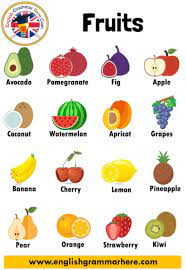
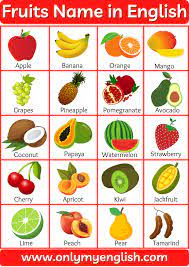
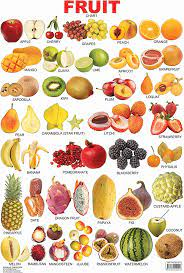
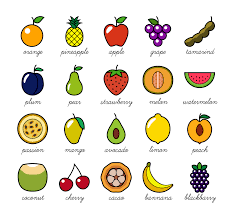
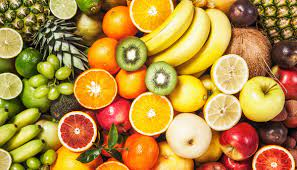
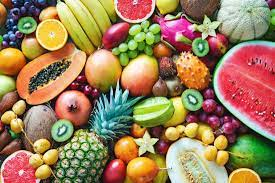
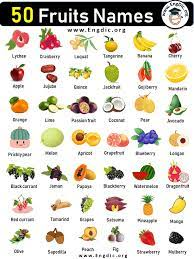
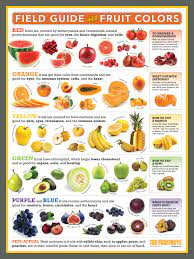
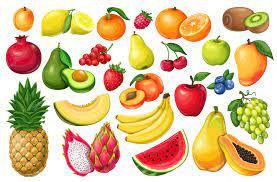
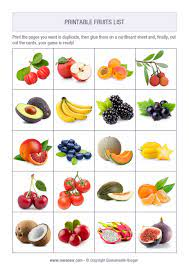
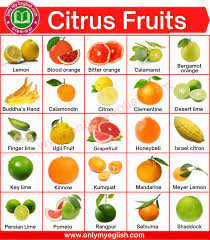
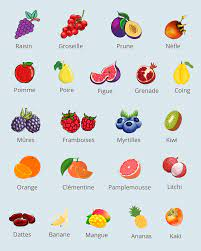
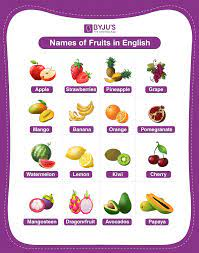
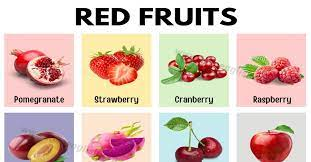
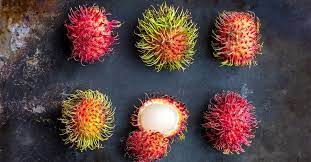
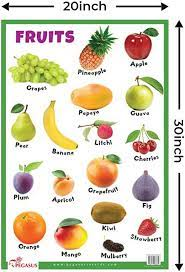
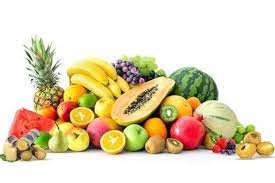
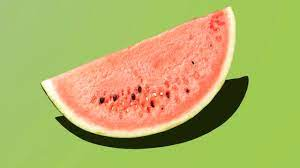
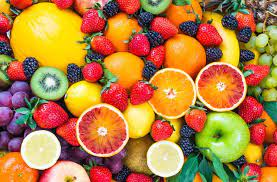
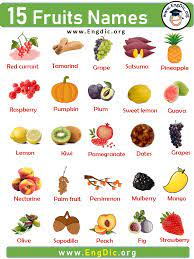

In [46]:
fruits

In [60]:
driver.get("https://images.google.com/")
search_bar=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]')
search_bar.send_keys("cars")



In [61]:
search_btn=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search_btn.click()


In [62]:
cars_tag=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
len(cars_tag)


48

In [63]:
cars=[]
for i in cars_tag:
    cars.append(i.get_attribute("src"))
len(cars)

48

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
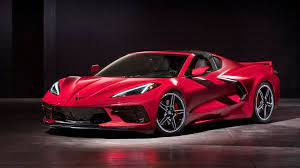
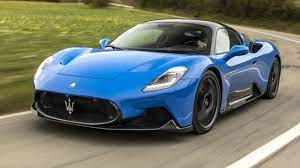
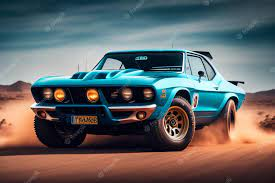
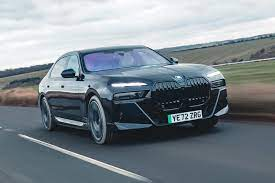
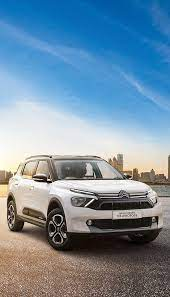
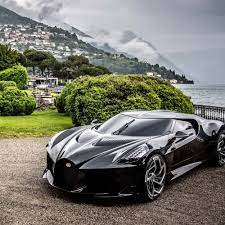
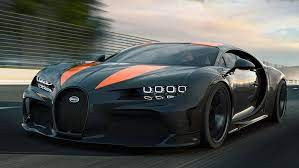
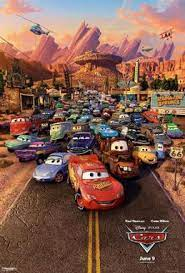
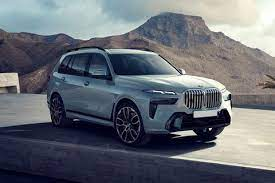
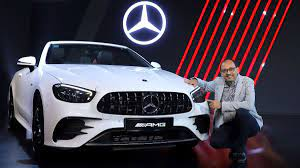
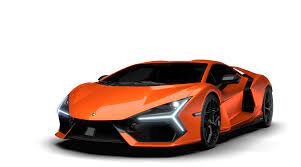
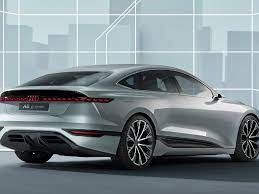
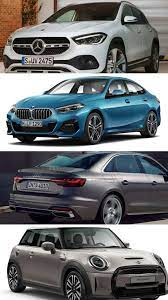
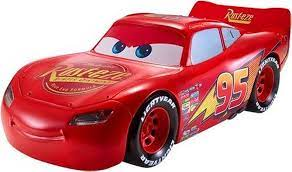
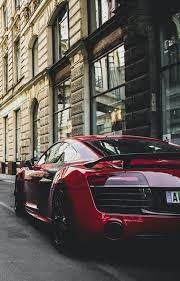
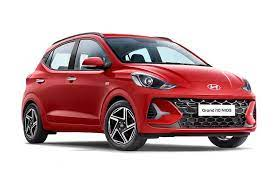
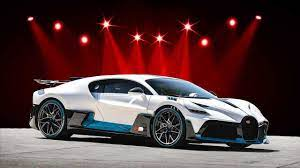
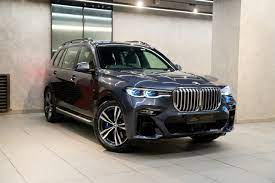
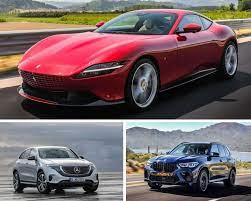
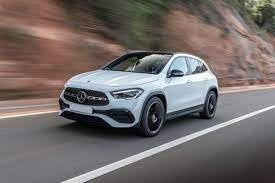

In [64]:
cars

In [65]:
driver.get("https://images.google.com/")
search_bar=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]')
search_bar.send_keys("Machine_Learning")

search_btn=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search_btn.click()



In [66]:
Machine_Learning_tag=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
len(Machine_Learning_tag)

48

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
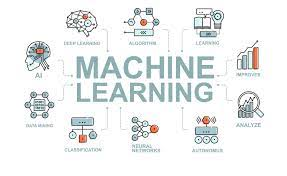
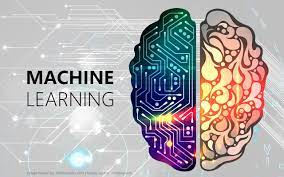
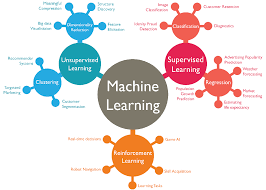
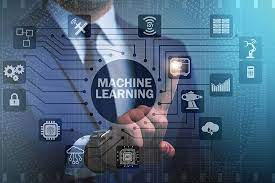
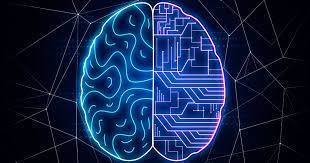
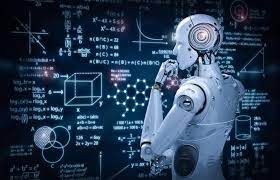
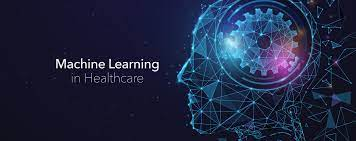
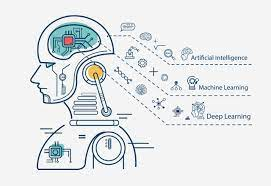
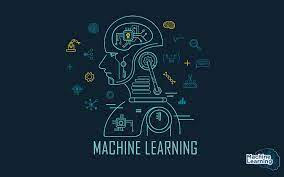
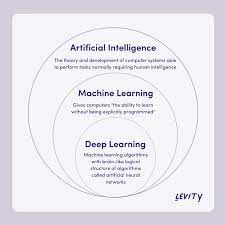
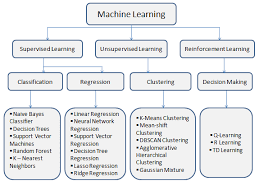
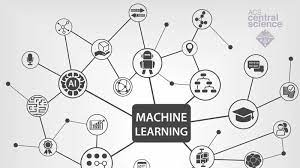
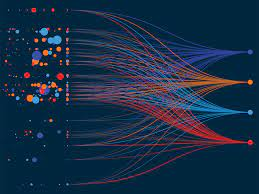
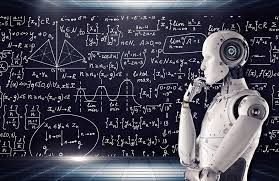
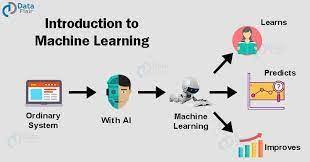
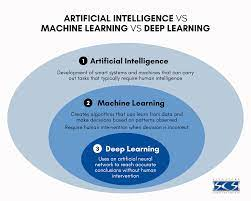
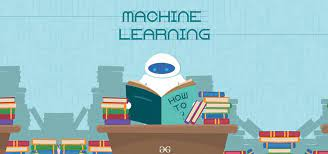
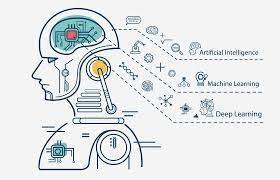
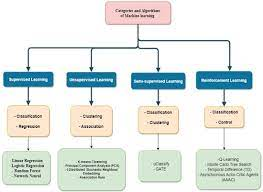
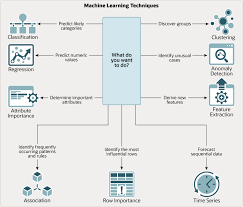

In [67]:
Machine_Learning=[]
for i in Machine_Learning_tag:
    Machine_Learning.append(i.get_attribute("src"))
Machine_Learning

In [68]:
driver.get("https://images.google.com/")
search_bar=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]')
search_bar.send_keys("Guitar")
search_btn=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search_btn.click()



In [69]:
Guitar_tag=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')

len(Guitar_tag)

48

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSegLxANrr6TZYfTIzEHoVOxPP1KR72McCKsg&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
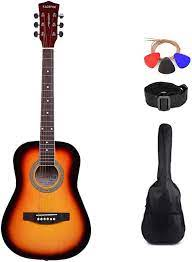
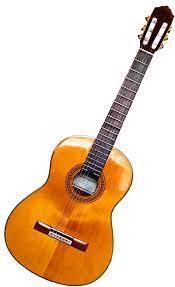
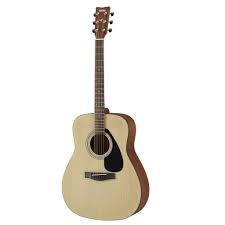
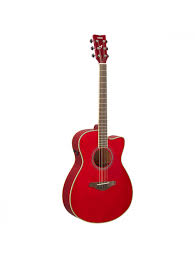
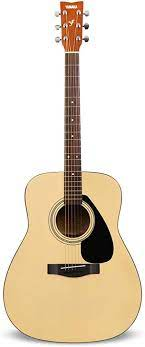
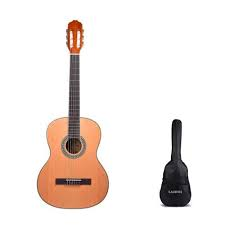
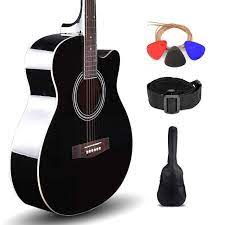
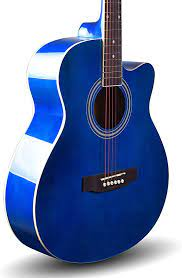
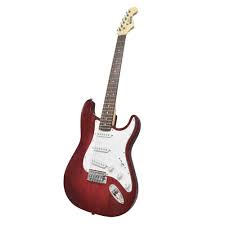
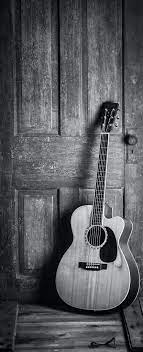
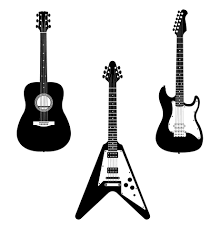
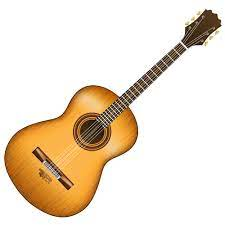
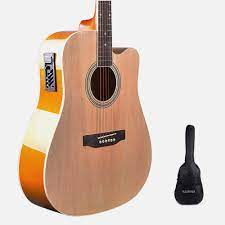
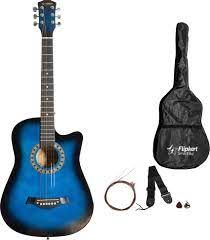
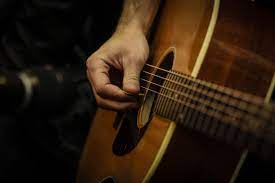
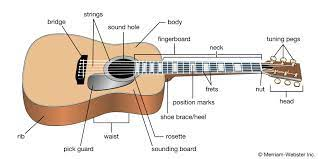
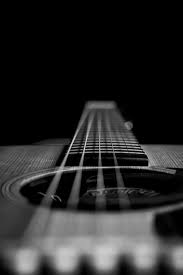
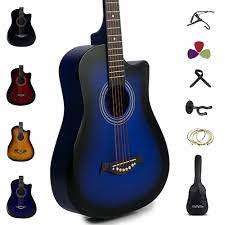
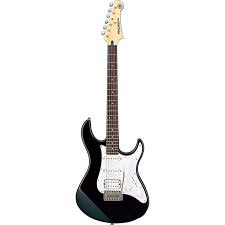
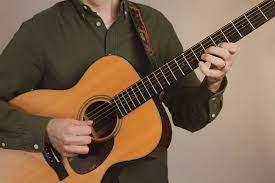

In [70]:
Guitar=[]
for i in Guitar_tag:
    Guitar.append(i.get_attribute("src"))
Guitar

In [71]:
driver.get("https://images.google.com/")
search_bar=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]')
search_bar.send_keys("Cakes")
search_btn=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search_btn.click()

In [72]:
Cakes_tag=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')

len(Cakes_tag)


48

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
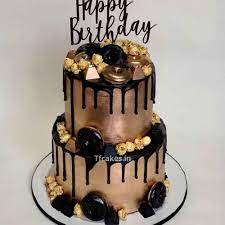
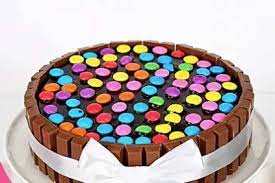
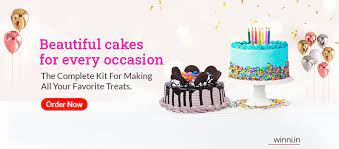
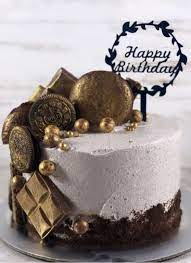
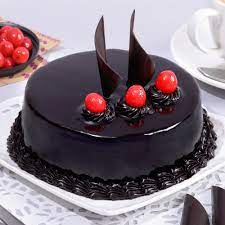
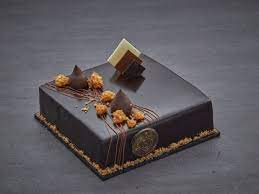
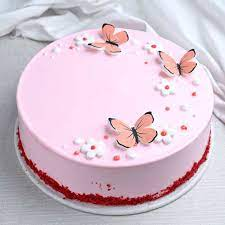
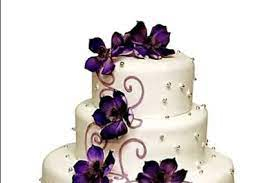
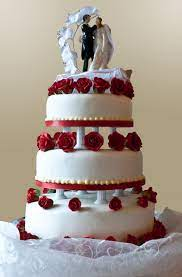
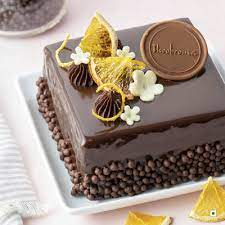
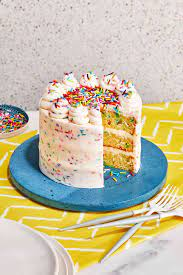
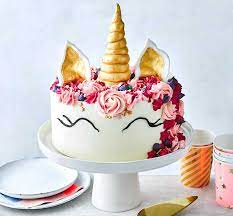
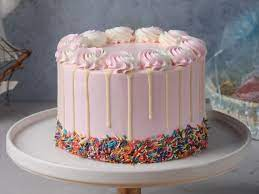
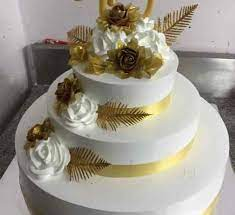
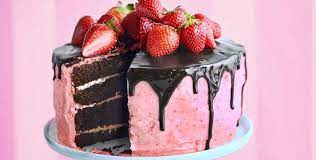
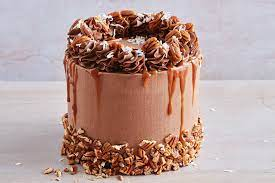
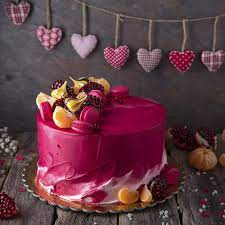
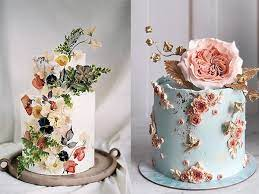
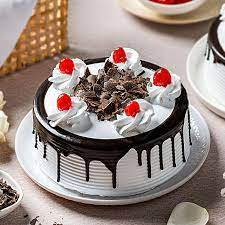
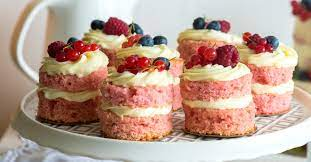

In [73]:
Cakes=[]
for i in Cakes_tag:
    Cakes.append(i.get_attribute("src"))
Cakes

In [75]:
data=pd.DataFrame()
data['Fruits']=fruits
data['Cakes']=Cakes
data['Machine_Learning']=Machine_Learning
data['Guitar']=Guitar
data['cars']=cars
data[:10]

,Fruits,Cakes,Machine_Learning,Guitar,cars
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


# 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [41]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()  # or webdriver.Firefox() if using Firefox browser

driver.get('https://www.flipkart.com/')

cancel = driver.find_element(By.XPATH, '//button[@class="_2KpZ6l _2doB4z"]')
cancel.click()

search = driver.find_element(By.XPATH, '//input[@class="_3704LK"]')
search.send_keys('smartphone')

search_btn = driver.find_element(By.XPATH, '//button[@class="L0Z3Pu"]')
search_btn.click()
time.sleep(3)

Brand_Name = []
Smartphone_name = []
Colour = []
RAM = []
Storage = []
Primary_Camera = []
Secondary_Camera = []
Display_Size = []
Battery = []
Price = []
Prod_URL = []

URL = driver.find_elements(By.XPATH, '//a[@class="_1fQZEK"]')
for i in URL:
    Prod_URL.append(i.get_attribute('href'))

brand = driver.find_elements(By.XPATH, '//div[@class="_4rR01T"]')
for i in brand:
    Brand_Name.append(i.text.split(' ')[0])

name = driver.find_elements(By.XPATH, '//div[@class="_4rR01T"]')
for i in name:
    Smartphone_name.append(i.text)

for i in Prod_URL:
    driver.get(i)
    time.sleep(1)
    driver.find_elements(By.XPATH, '//button[@class="_2KpZ6l _1FH0tX"]')
    try:
        click = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/button")
        click.click()
    except NoSuchElementException:
        click = driver.find_element(By.XPATH, '//button[@class="_2KpZ6l _1FH0tX"]')
        click.click()

    try:
        col = driver.find_elements(By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div/div[1]/table/tbody/tr[4]/td[2]/ul/li')
        for i in col:
            Colour.append(i.text)
    except NoSuchElementException:
        col = driver.find_elements(By.XPATH, '//div[@class="_1UhVsV _3AsE0T"]/div[1]/table/tbody/tr[4]/td[2]')
        for i in col:
            Colour.append(i.text)
    except:
        Colour.append('-')

    try:
        col = driver.find_elements(By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[2]/td[2]')
        for i in col:
            RAM.append(i.text)
    except:
        RAM.append('-')

    try:
        col = driver.find_elements(By.XPATH, '//div[@class="_1UhVsV"]/div[4]/table/tbody/tr[1]/td[2]')
        for i in col:
            Storage.append(i.text)
    except:
        Storage.append('-')

    try:
        col = driver.find_elements(By.XPATH, '//div[@class="_1UhVsV"]/div[5]/table/tbody/tr[2]/td[2]')
        for i in col:
            Primary_Camera.append(i.text)
    except:
        Primary_Camera.append('-')

    try:
        col = driver.find_elements(By.XPATH, '//div[@class="_1UhVsV"]/div[5]/table/tbody/tr[5]/td[2]')
        for i in col:
            Secondary_Camera.append(i.text)
    except:
        Secondary_Camera.append('-')

    try:
        col = driver.find_elements(By.XPATH, '//div[@class="_1UhVsV"]/div[2]/table/tbody/tr[1]/td[2]')
        for i in col:
            Display_Size.append(i.text)
    except:
        Display_Size.append('-')

    try:
        col = driver.find_elements(By.XPATH, '//div[@class="_1UhVsV"]/div[9]/table/tbody/tr/td[2]')
        for i in col:
            Battery.append(i.text)
    except:
        Battery.append('-')

    try:
        col = driver.find_elements(By.XPATH, '//div[@class="_30jeq3 _16Jk6d"]')
        for i in col:
            Price.append(i.text)
    except:
        Price.append('-')

driver.quit()


In [43]:
print("Brand_Name:", len(Brand_Name))
print("Smartphone_name:", len(Smartphone_name))
print("Colour:", len(Colour))
print("RAM:", len(RAM))
print("Storage:", len(Storage))
print("Primary_Camera:", len(Primary_Camera))
print("Secondary_Camera:", len(Secondary_Camera))
print("Display_Size:", len(Display_Size))
print("Battery:", len(Battery))
print("Price:", len(Price))


Brand_Name: 24
Smartphone_name: 24
Colour: 19
RAM: 19
Storage: 24
Primary_Camera: 24
Secondary_Camera: 24
Display_Size: 24
Battery: 85
Price: 24


In [44]:
df3=pd.DataFrame({"Brand_Name":Brand_Name,"Smartphone_name":Smartphone_name,"Storage":Storage,"Primary_Camera":Primary_Camera,"Display_Size":Display_Size,"Price":Price})
df3

,Brand_Name,Smartphone_name,Storage,Primary_Camera,Display_Size,Price
0,SAMSUNG,"SAMSUNG Galaxy F04 (Jade Purple, 64 GB)",64 GB,13MP + 2MP,16.51 cm (6.5 inch),"₹8,990"
1,Infinix,"Infinix SMART 7 (Azure Blue, 64 GB)",64 GB,13MP + AI Lens,16.76 cm (6.6 inch),"₹6,999"
2,Infinix,"Infinix SMART 7 (Azure Blue, 128 GB)",128 GB,13MP + AI Lens,16.76 cm (6.6 inch),"₹7,799"
3,Infinix,"Infinix SMART 7 (Emerald Green, 128 GB)",128 GB,13MP + AI Lens,16.76 cm (6.6 inch),"₹7,799"
4,Infinix,"Infinix SMART 7 (Emerald Green, 64 GB)",64 GB,13MP + AI Lens,16.76 cm (6.6 inch),"₹6,999"
5,Infinix,"Infinix Smart 7 HD (Jade White, 64 GB)",64 GB,8MP + AI Lens,16.76 cm (6.6 inch),"₹5,999"
6,Infinix,"Infinix Smart 7 HD (Ink Black, 64 GB)",64 GB,8MP + AI Lens,16.76 cm (6.6 inch),"₹5,999"
7,Infinix,"Infinix Smart 7 HD (Silk Blue, 64 GB)",64 GB,8MP + AI Lens,16.76 cm (6.6 inch),"₹5,999"
8,Infinix,"Infinix Smart 7 HD (Green Apple, 64 GB)",64 GB,8MP + AI Lens,16.76 cm (6.6 inch),"₹5,999"
9,POCO,"POCO C51 (Royal Blue, 64 GB)",64 GB,8MP Dual Rear Camera,16.56 cm (6.52 inch),"₹6,499"


In [45]:
#converting dataframe to CSV
df3.to_csv('Smartphones')

# 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [53]:
driver.get('https://www.google.com/maps/')


In [54]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div/div[2]/form/input')
search.send_keys('Darbhanga')

In [55]:
search_btn = driver.find_element(By.XPATH,'//div[@class="pzfvzf"]')
search_btn.click()
time.sleep(3)


In [56]:
link = driver.current_url
print("Current URL:",link)
latt = re.findall('\@(-?[\d\.]*)',link)
long = re.findall('\@[-?\d\.]*\,([-?\d\.]*)', link)

print("The Geospatial cordinates of location searched is: Lattitude: {},Longitude:{} ".format(latt,long))

Current URL: https://www.google.com/maps/place/Darbhanga,+Bihar/@26.150631,85.9031781,12z/data=!4m6!3m5!1s0x39edb835434acdb1:0x70ec31d04822699e!8m2!3d26.1542045!4d85.8918454!16zL20vMDRoYzE2?entry=ttu
The Geospatial cordinates of location searched is: Lattitude: ['26.150631'],Longitude:['85.9031781'] 


# 6. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [31]:
# opening the url digit.in
url = "https://www.digit.in/"
driver.get(url)
time.sleep(2)

In [32]:
# searching for best Laptop
best_gam_laptops = driver.find_element(By.XPATH,"//div[@class='listing_container']//ul//li[9]").click()
time.sleep(3)

In [33]:
# creating empty list
Laptop_Name = []
Operating_sys = []
Display = []
Processor = []
Memory = []
Weight = []
Dimensions = []
Graph_proc = []
Price = []

In [39]:
#scraping the data of laptop names
laptop_name = driver.find_elements(By.XPATH,"//div[@class='right-container']/div/a/h3")
for name in laptop_name:
    Laptop_Name.append(name.text)
    
#scraping the data of operating system
try:
    op_sys = driver.find_elements(By.XPATH,"//div[@class='product-detail']/div/ul/li[1]/div/div")
    for os in op_sys:
        Operating_sys.append(os.text)
except NoSuchElementException:
    pass


#scraping data of display of the Laptop
try:
    display = driver.find_elements(By.XPATH,"//div[@class='product-detail']/div/ul/li[2]/div/div")
    for disp in display:
        Display.append(disp.text)
except NoSuchElementException:
    pass


# scraping data of processor
try:
    processor = driver.find_elements(By.XPATH,"//div[@class='Spcs-details'][1]/table/tbody/tr[5]/td[3]")
    for pro in processor:
        Processor.append(pro.text)
except NoSuchElementException:
    pass


# scraping the data of memory
try:
    memory = driver.find_elements(By.XPATH,"//div[@class='Spcs-details'][1]/table/tbody/tr[6]/td[3]")
    for memo in memory:
        Memory.append(memo.text)
except NoSuchElementException:
    pass


# scraping data of weight
try:
    weight = driver.find_elements(By.XPATH,"//div[@class='Spcs-details'][1]/table/tbody/tr[7]/td[3]")
    for wgt in weight:
        Weight.append(wgt.text)
except NoSuchElementException:
    pass


# scraping data of dimensions
try:
    dimension = driver.find_elements(By.XPATH,"//div[@class='Spcs-details'][1]/table/tbody/tr[8]/td[3]")
    for dim in dimension:
        Dimensions.append(dim.text)
except NoSuchElementException:
    pass




# scraping the data of price
try:
    price = driver.find_elements(By.XPATH,"//td[@class='smprice']")
    for pri in price:
        Price.append(pri.text.replace('₹ ','Rs'))
except NoSuchElementException:
    pass

In [43]:
print(len(Laptop_Name),
len(Operating_sys),
len(Display),
len(Processor),
len(Memory),
len(Weight),
len(Dimensions),
len(Price))

9 35 14 14 14 14 14 0 14


In [44]:
#creating DataFrame for scraped data
Gaming_Laptop=pd.DataFrame({})
Gaming_Laptop['Laptop Name'] = Laptop_Name[:9]
Gaming_Laptop['Operating System'] =Operating_sys[:9]
Gaming_Laptop['Display'] = Display[:9]
Gaming_Laptop['Processor'] = Processor[:9]
Gaming_Laptop['Memory'] = Memory[:9]
Gaming_Laptop['Weight'] = Weight[:9]
Gaming_Laptop['Dimensions'] = Dimensions[:9]
Gaming_Laptop['Price'] = Price[:9]
Gaming_Laptop

,Laptop Name,Operating System,Display,Processor,Memory,Weight,Dimensions,Price
0,HP OMEN 17 (2023),Windows 11 Home,"17.3"" (2560 x 1440)",16 GB DDR5GB RAM & 1 TB SSD,12 GB DDR6 NVIDIA GeForce RTX 4080 Graphics card,397.1 x 262 x 27 mm dimension & 2.78 kg weight,"₹ 269,777","Rs269,777"
1,MSI Titan GT77 12UHS,"17.3"" (2560 x 1440)","17.3"" (3840 x 2160)",64 GB DDR5GB RAM & 2 TB SSD,16 GB DDR6 NVIDIA GeForce RTX 3080Ti Graphics ...,397 x 330 x 23 mm dimension & 3.3 kg weight,"₹ 499,990","Rs499,990"
2,Lenovo Legion 5i Pro,13th Gen Intel Core i7-13700HX | 5.0 GHz,"16"" (2560 x 1600)",32 GB DDR5GB RAM & 1 TB SSD,NVIDIA GeForce RTX 3070 Ti Graphics card,359.9 x 264.4 x 19.9 mm dimension & 3.6 kg weight,"₹ 179,990","Rs179,990"
3,ASUS ROG Strix Scar 18 2023,1 TB SSD/16 GB DDR5,"18"" (1920 x 1200)",32 GB DDR5GB RAM & 1 TB SSD,12 GB DDR6 NVIDIA GeForce RTX 4080 Graphics card,294 x 399 x 23 mm dimension & 3.1 kg weight,"₹ 279,990","Rs279,990"
4,Acer Predator Helios Neo 16,Windows 11 Home,"16"" (2560 x 1600)",16 GB DDR5GB RAM & 1 TB SSD,8 GB DDR6 NVIDIA GeForce RTX 4060 Graphics card,360 x 279 x 28 mm dimension & 2.6 kg weight,"₹ 149,990","Rs149,990"
5,ASUS ROG Zephyrus G14,"17.3"" (3840 x 2160)","14"" (1920 x 1200)",16 GB DDR5GB RAM & 1 TB SSD,8 GB DDR6 AMD Radeon RX 6700S Graphics card,312 x 227 x 19 mm dimension & 1.65 kg weight,"₹ 156,990","Rs156,990"
6,MSI Cyborg 15,12th Gen Intel Core i9-12900HX | 3.6 GHz,"15.6"" (1920 x 1080)",16 GB DDR5GB RAM & 1 TB SSD,8 GB DDR6 NVIDIA GeForce RTX 4060 Graphics card,& 1.98 kg weight,"₹ 125,000","Rs125,000"
7,CURRENT / PAST ISSUE,2 TB SSD/64 GB DDR5,"17.3"" (2560 x 1440)",16 GB DDR5GB RAM & 1 TB SSD,12 GB DDR6 NVIDIA GeForce RTX 4080 Graphics card,397.1 x 262 x 27 mm dimension & 2.78 kg weight,"₹ 269,777","Rs269,777"
8,MAGAZINE SUBSCRIPTION,Windows 11 Home,"17.3"" (3840 x 2160)",64 GB DDR5GB RAM & 2 TB SSD,16 GB DDR6 NVIDIA GeForce RTX 3080Ti Graphics ...,397 x 330 x 23 mm dimension & 3.3 kg weight,"₹ 499,990","Rs499,990"


# 7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [3]:
driver.get("https://www.forbes.com/billionaires/")

In [4]:
# Scrapping required details:

#creating empty lists:
Rank = []
Name = []
Net_Worth = []
Age = []
Citizenship = []
Source = []
Industry = []

# Scraping Ranks

try:
    R = driver.find_elements(By.XPATH,'//div[@class="Table_rank___YBhk Table_dataCell__2QCve"]')
    for i in R:
        Rank.append(i.text)
except NoSuchElementException:
    Rank.append("-")
len(Rank)

200

In [5]:
Rank

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '31',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '41',
 '43',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '65',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '72',
 '74',
 '74',
 '76',
 '77',
 '77',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '84',
 '86',
 '86',
 '88',
 '89',
 '89',
 '89',
 '92',
 '93',
 '94',
 '94',
 '94',
 '97',
 '97',
 '99',
 '100',
 '101',
 '101',
 '103',
 '104',
 '104',
 '106',
 '107',
 '108',
 '108',
 '108',
 '108',
 '112',
 '113',
 '114',
 '115',
 '116',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '124',
 '126',
 '127',
 '128',
 '128',
 '130',
 '130',
 '130',
 '133',
 '133',
 '133',
 '136',
 '137',
 '138',
 '13

In [6]:
#Scraping Names
try:
    N = driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
    for i in N:
        Name.append(i.text)
except NoSuchElementException:
    Name.append("-")
Name[::4]

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Mukesh Ambani',
 'Steve Ballmer',
 'Francoise Bettencourt Meyers & family',
 'Larry Page',
 'Amancio Ortega',
 'Sergey Brin',
 'Zhong Shanshan',
 'Mark Zuckerberg',
 'Charles Koch',
 'Julia Koch & family',
 'Jim Walton',
 'Rob Walton',
 'Alice Walton',
 'David Thomson & family',
 'Michael Dell',
 'Gautam Adani',
 'Phil Knight & family',
 'Zhang Yiming',
 'Dieter Schwarz',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Giovanni Ferrero',
 'Jacqueline Mars',
 'John Mars',
 'Li Ka-shing',
 'Ma Huateng',
 'Miriam Adelson & family',
 'Ken Griffin',
 'Mark Mateschitz',
 'Robin Zeng',
 'Tadashi Yanai & family',
 'Len Blavatnik',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Gianluigi Aponte',
 'Rafaela Aponte-Diamant',
 'Colin Zheng Huang',
 'Reinhold Wuerth & family',
 'Lee Shau Kee',
 'Jeff Yass',
 'Jim Simons',
 'Stephe

In [7]:
names=Name[::4]
names

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Mukesh Ambani',
 'Steve Ballmer',
 'Francoise Bettencourt Meyers & family',
 'Larry Page',
 'Amancio Ortega',
 'Sergey Brin',
 'Zhong Shanshan',
 'Mark Zuckerberg',
 'Charles Koch',
 'Julia Koch & family',
 'Jim Walton',
 'Rob Walton',
 'Alice Walton',
 'David Thomson & family',
 'Michael Dell',
 'Gautam Adani',
 'Phil Knight & family',
 'Zhang Yiming',
 'Dieter Schwarz',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Giovanni Ferrero',
 'Jacqueline Mars',
 'John Mars',
 'Li Ka-shing',
 'Ma Huateng',
 'Miriam Adelson & family',
 'Ken Griffin',
 'Mark Mateschitz',
 'Robin Zeng',
 'Tadashi Yanai & family',
 'Len Blavatnik',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Gianluigi Aponte',
 'Rafaela Aponte-Diamant',
 'Colin Zheng Huang',
 'Reinhold Wuerth & family',
 'Lee Shau Kee',
 'Jeff Yass',
 'Jim Simons',
 'Stephe

In [8]:
#Scraping Net Worth
try:
    NW = driver.find_elements(By.XPATH,'//div[@class="Table_netWorth___L4R5 Table_dataCell__2QCve"]')
    for i in NW:
        Net_Worth.append(i.text)
except NoSuchElementException:
    Net_Worth.append("-")
    
Net_Worth

['$211 B',
 '$180 B',
 '$114 B',
 '$107 B',
 '$106 B',
 '$104 B',
 '$94.5 B',
 '$93 B',
 '$83.4 B',
 '$80.7 B',
 '$80.5 B',
 '$79.2 B',
 '$77.3 B',
 '$76 B',
 '$68 B',
 '$64.4 B',
 '$59 B',
 '$59 B',
 '$58.8 B',
 '$57.6 B',
 '$56.7 B',
 '$54.4 B',
 '$50.1 B',
 '$47.2 B',
 '$45.1 B',
 '$45 B',
 '$42.9 B',
 '$40.1 B',
 '$39.1 B',
 '$38.9 B',
 '$38.3 B',
 '$38.3 B',
 '$38 B',
 '$35.3 B',
 '$35 B',
 '$35 B',
 '$34.7 B',
 '$33.4 B',
 '$32.6 B',
 '$32.1 B',
 '$31.6 B',
 '$31.6 B',
 '$31.2 B',
 '$31.2 B',
 '$30.2 B',
 '$29.7 B',
 '$29.5 B',
 '$28.5 B',
 '$28.1 B',
 '$27.8 B',
 '$27.4 B',
 '$27 B',
 '$26.7 B',
 '$26.6 B',
 '$25.6 B',
 '$25.5 B',
 '$25.3 B',
 '$25.2 B',
 '$24.6 B',
 '$24.4 B',
 '$24.2 B',
 '$23.7 B',
 '$23.5 B',
 '$23.4 B',
 '$23.1 B',
 '$23.1 B',
 '$22.9 B',
 '$22.6 B',
 '$22.4 B',
 '$22.1 B',
 '$22 B',
 '$21.6 B',
 '$21.6 B',
 '$21.2 B',
 '$21.2 B',
 '$21.1 B',
 '$21 B',
 '$21 B',
 '$20.9 B',
 '$20.5 B',
 '$20.2 B',
 '$19.6 B',
 '$19.1 B',
 '$19 B',
 '$19 B',
 '$18.9 B',
 '$1

In [9]:
#Scraping Age
try:
    A = driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
    for i in A:
        Age.append(i.text)
except NoSuchElementException:
    Age.append("-")
len(Age)

800

In [10]:
# Filter out elements that contain only numbers (ages)
age = [Age for Age in Age if Age.replace('&', '').strip().isnumeric()]

age


['74',
 '51',
 '59',
 '78',
 '92',
 '67',
 '81',
 '83',
 '65',
 '67',
 '69',
 '50',
 '87',
 '49',
 '68',
 '38',
 '87',
 '60',
 '74',
 '78',
 '73',
 '65',
 '58',
 '60',
 '85',
 '39',
 '83',
 '86',
 '85',
 '58',
 '83',
 '87',
 '94',
 '51',
 '77',
 '54',
 '30',
 '54',
 '74',
 '65',
 '74',
 '72',
 '82',
 '78',
 '43',
 '87',
 '95',
 '64',
 '84',
 '76',
 '60',
 '69',
 '51',
 '69',
 '77',
 '74',
 '78',
 '51',
 '56',
 '52',
 '82',
 '62',
 '58',
 '80',
 '80',
 '83',
 '70',
 '81',
 '65',
 '66',
 '52',
 '61',
 '67',
 '36',
 '52',
 '60',
 '90',
 '77',
 '57',
 '72',
 '84',
 '61',
 '73',
 '59',
 '55',
 '72',
 '57',
 '57',
 '77',
 '65',
 '70',
 '61',
 '72',
 '66',
 '87',
 '73',
 '90',
 '83',
 '92',
 '70',
 '72',
 '55',
 '72',
 '75',
 '67',
 '55',
 '67',
 '83',
 '76',
 '67',
 '45',
 '68',
 '56',
 '83',
 '81',
 '78',
 '68',
 '56',
 '59',
 '69',
 '95',
 '55',
 '65',
 '93',
 '67',
 '57',
 '94',
 '78',
 '76',
 '47',
 '80',
 '80',
 '71',
 '60',
 '90',
 '64',
 '75',
 '58',
 '57',
 '50',
 '69',
 '72',
 '59',

In [11]:
#Scraping country Of Citizenship
try:
    C = driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"]')
    for i in C:
        Citizenship.append(i.text)
except NoSuchElementException:
    Citizenship.append("-")
    
len(Citizenship)

1400

In [12]:
Citizenship

['1',
 'Bernard Arnault & family',
 '$211 B',
 '74',
 'France',
 'LVMH',
 'Fashion & Retail',
 '2',
 'Elon Musk',
 '$180 B',
 '51',
 'United States',
 'Tesla, SpaceX',
 'Automotive',
 '3',
 'Jeff Bezos',
 '$114 B',
 '59',
 'United States',
 'Amazon',
 'Technology',
 '4',
 'Larry Ellison',
 '$107 B',
 '78',
 'United States',
 'Oracle',
 'Technology',
 '5',
 'Warren Buffett',
 '$106 B',
 '92',
 'United States',
 'Berkshire Hathaway',
 'Finance & Investments',
 '6',
 'Bill Gates',
 '$104 B',
 '67',
 'United States',
 'Microsoft',
 'Technology',
 '7',
 'Michael Bloomberg',
 '$94.5 B',
 '81',
 'United States',
 'Bloomberg LP',
 'Media & Entertainment',
 '8',
 'Carlos Slim Helu & family',
 '$93 B',
 '83',
 'Mexico',
 'Telecom',
 'Telecom',
 '9',
 'Mukesh Ambani',
 '$83.4 B',
 '65',
 'India',
 'Diversified',
 'Diversified',
 '10',
 'Steve Ballmer',
 '$80.7 B',
 '67',
 'United States',
 'Microsoft',
 'Technology',
 '11',
 'Francoise Bettencourt Meyers & family',
 '$80.5 B',
 '69',
 'France',
 

In [13]:
# Extract citizenship (country) information from the list using the fifth position
citizenship = [Citizenship[i] for i in range(4, len(Citizenship), 7)]

# Print the extracted citizenship information
for country in citizenship:
    print(country)


France
United States
United States
United States
United States
United States
United States
Mexico
India
United States
France
United States
Spain
United States
China
United States
United States
United States
United States
United States
United States
Canada
United States
India
United States
China
Germany
France
Germany
Italy
United States
United States
Hong Kong
China
United States
United States
Austria
Hong Kong
Japan
United States
France
France
Switzerland
Switzerland
China
Germany
Hong Kong
United States
United States
United States
Germany
Australia
China
Mexico
India
Indonesia
United States
Russia
Germany
United States
Indonesia
Russia
China
China
Chile
Indonesia
United Kingdom
India
Japan
Russia
France
United States
Russia
United States
China
United States
United States
Japan
Russia
Russia
United States
Australia
United States
China
China
Israel
China
China
United States
United States
Russia
United States
India
United States
United States
India
United States
United States
United Sta

In [14]:
citizenship

['France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Mexico',
 'India',
 'United States',
 'France',
 'United States',
 'Spain',
 'United States',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Canada',
 'United States',
 'India',
 'United States',
 'China',
 'Germany',
 'France',
 'Germany',
 'Italy',
 'United States',
 'United States',
 'Hong Kong',
 'China',
 'United States',
 'United States',
 'Austria',
 'Hong Kong',
 'Japan',
 'United States',
 'France',
 'France',
 'Switzerland',
 'Switzerland',
 'China',
 'Germany',
 'Hong Kong',
 'United States',
 'United States',
 'United States',
 'Germany',
 'Australia',
 'China',
 'Mexico',
 'India',
 'Indonesia',
 'United States',
 'Russia',
 'Germany',
 'United States',
 'Indonesia',
 'Russia',
 'China',
 'China',
 'Chile',
 'Indonesia',
 'United Kingdom',
 'India',
 'Japan',
 'Russia',
 'France',
 

In [15]:
#Scraping Source
try:
    S = driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
    for i in S:
        Source.append(i.text)
except NoSuchElementException:
    Source.append("-")
    
print(Source)


['Bernard Arnault & family', '74', 'LVMH', 'Fashion & Retail', 'Elon Musk', '51', 'Tesla, SpaceX', 'Automotive', 'Jeff Bezos', '59', 'Amazon', 'Technology', 'Larry Ellison', '78', 'Oracle', 'Technology', 'Warren Buffett', '92', 'Berkshire Hathaway', 'Finance & Investments', 'Bill Gates', '67', 'Microsoft', 'Technology', 'Michael Bloomberg', '81', 'Bloomberg LP', 'Media & Entertainment', 'Carlos Slim Helu & family', '83', 'Telecom', 'Telecom', 'Mukesh Ambani', '65', 'Diversified', 'Diversified', 'Steve Ballmer', '67', 'Microsoft', 'Technology', 'Francoise Bettencourt Meyers & family', '69', "L'Oréal", 'Fashion & Retail', 'Larry Page', '50', 'Google', 'Technology', 'Amancio Ortega', '87', 'Zara', 'Fashion & Retail', 'Sergey Brin', '49', 'Google', 'Technology', 'Zhong Shanshan', '68', 'Beverages, pharmaceuticals', 'Food & Beverage', 'Mark Zuckerberg', '38', 'Facebook', 'Technology', 'Charles Koch', '87', 'Koch Industries', 'Diversified', 'Julia Koch & family', '60', 'Koch Industries', 'Di

In [16]:
source=Source[2::4]
source

['LVMH',
 'Tesla, SpaceX',
 'Amazon',
 'Oracle',
 'Berkshire Hathaway',
 'Microsoft',
 'Bloomberg LP',
 'Telecom',
 'Diversified',
 'Microsoft',
 "L'Oréal",
 'Google',
 'Zara',
 'Google',
 'Beverages, pharmaceuticals',
 'Facebook',
 'Koch Industries',
 'Koch Industries',
 'Walmart',
 'Walmart',
 'Walmart',
 'Media',
 'Dell Technologies',
 'Infrastructure, commodities',
 'Nike',
 'TikTok',
 'Retail',
 'Luxury goods',
 'Shipping',
 'Nutella, chocolates',
 'Candy, pet food',
 'Candy, pet food',
 'Diversified',
 'Internet media',
 'Casinos',
 'Hedge funds',
 'Red Bull',
 'Batteries',
 'Fashion retail',
 'Music, chemicals',
 'Chanel',
 'Chanel',
 'Shipping',
 'Shipping',
 'E-commerce',
 'Fasteners',
 'Real estate',
 'Trading, investments',
 'Hedge funds',
 'Investments',
 'BMW, pharmaceuticals',
 'Mining',
 'Online games',
 'Mining',
 'Software services',
 'Coal',
 'Discount brokerage',
 'Fertilizers, coal',
 'BMW',
 'Amazon',
 'Banking, tobacco',
 'Metals',
 'E-commerce',
 'Home appliances

In [18]:
#Scraping Industry
try:
    I = driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
    for i in I:
        Industry.append(i.text)
except NoSuchElementException:
    Industry.append("-")
    
Industry

['Bernard Arnault & family',
 '74',
 'LVMH',
 'Fashion & Retail',
 'Elon Musk',
 '51',
 'Tesla, SpaceX',
 'Automotive',
 'Jeff Bezos',
 '59',
 'Amazon',
 'Technology',
 'Larry Ellison',
 '78',
 'Oracle',
 'Technology',
 'Warren Buffett',
 '92',
 'Berkshire Hathaway',
 'Finance & Investments',
 'Bill Gates',
 '67',
 'Microsoft',
 'Technology',
 'Michael Bloomberg',
 '81',
 'Bloomberg LP',
 'Media & Entertainment',
 'Carlos Slim Helu & family',
 '83',
 'Telecom',
 'Telecom',
 'Mukesh Ambani',
 '65',
 'Diversified',
 'Diversified',
 'Steve Ballmer',
 '67',
 'Microsoft',
 'Technology',
 'Francoise Bettencourt Meyers & family',
 '69',
 "L'Oréal",
 'Fashion & Retail',
 'Larry Page',
 '50',
 'Google',
 'Technology',
 'Amancio Ortega',
 '87',
 'Zara',
 'Fashion & Retail',
 'Sergey Brin',
 '49',
 'Google',
 'Technology',
 'Zhong Shanshan',
 '68',
 'Beverages, pharmaceuticals',
 'Food & Beverage',
 'Mark Zuckerberg',
 '38',
 'Facebook',
 'Technology',
 'Charles Koch',
 '87',
 'Koch Industries',


In [19]:
industry=Industry[3::4]
industry

['Fashion & Retail',
 'Automotive',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Media & Entertainment',
 'Telecom',
 'Diversified',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Logistics',
 'Food & Beverage',
 'Food & Beverage',
 'Food & Beverage',
 'Diversified',
 'Technology',
 'Gambling & Casinos',
 'Finance & Investments',
 'Food & Beverage',
 'Automotive',
 'Fashion & Retail',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Logistics',
 'Logistics',
 'Technology',
 'Manufacturing',
 'Real Estate',
 'Finance & Investments',
 'Finance & Investments',
 'Finance & Investments',
 'Automotive',
 'Metals & Mining',
 'Technology',
 'Metals & Min

In [21]:
print(len(Rank),len(names),len(Net_Worth),len(age),len(citizenship),len(source),len(industry))

200 200 200 198 200 200 400


In [25]:
# framing Data
Billionaires = pd.DataFrame({})
Billionaires['Rank'] = Rank[:198]
Billionaires['Name'] = names[:198]
Billionaires['Net Worth'] = Net_Worth[:198]
Billionaires['Age'] = age[:198]
Billionaires['Citizenship'] = citizenship[:198]
Billionaires['Source'] = source[:198]
Billionaires['Industry'] = industry[:198]
Billionaires.index +=1
Billionaires

,Rank,Name,Net Worth,Age,Citizenship,Source,Industry
1,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
2,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
3,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
4,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
5,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
194,190,Sun Piaoyang,$9.7 B,70,China,Pharmaceuticals,Healthcare
195,195,Rick Cohen & family,$9.6 B,67,United States,Warehouse automation,Technology
196,195,Jin Baofang,$9.6 B,58,China,Solar panels,Energy
197,195,Luo Liguo & family,$9.6 B,62,China,Chemicals,Manufacturing


# 8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [30]:
driver.get('https://www.youtube.com/watch?v=DVs3TReDkwo')

In [31]:
# Scrapping required details:

#Creating Empty Lists
Comment = []
Upvote = []
Time = []

# Scraping Comments 
C = driver.find_elements(By.ID,"content-text")
for i in C:
    Comment.append(i.text)
    
#Scrapping Upvotes
try:
    U = driver.find_elements(By.XPATH,'//span[@id="vote-count-middle"]')
    for i in U:
        Upvote.append(i.text)
except NoSuchElementException:
    Upvote.append("-")

#Scrapping when comment was posted 
try:
    T = driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
    for i in T:
        Time.append(i.text)
except NoSuchElementException:
    Time.append("-")

In [32]:
print(len(Comment),len(Upvote),len(Time))

20 20 24


In [33]:
df = pd.DataFrame({'Comments':Comment[:20],
                   'Comment upvote':Upvote[:20],
                   'time when comment was posted':Time[:20]})

df


,Comments,Comment upvote,time when comment was posted
0,I am a Christian and an environmental biologis...,308,BEwithSADHGURU
1,He’s so right about eating the fruits by seaso...,35,
2,I started to salute Indians for their great un...,52,
3,This video inspired me to cut all unhealthy fo...,468,
4,I took fruits for dinner almost 3months to loo...,131,1 year ago
5,He moves me every time in a direction that I ...,132,2 months ago
6,My spouse argues with me about not eating frui...,886,11 months ago
7,Sadhguru is a wise and inspiring man. \nThe mo...,2,1 year ago
8,Beautifully explained. Lots of love to Sadhgur...,24,8 months ago
9,I'm the witness for his words I'm suffering fr...,40,9 months ago


# 9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [3]:
driver.get('https://www.hostelworld.com/')

In [4]:
search_locn=driver.find_element(By.XPATH,'//input[@class="native-input body-1-reg"]')
search_locn

<selenium.webdriver.remote.webelement.WebElement (session="8ef66771ff7a11a3c9087a27557f1a88", element="8F161ABBE541107871EA6B02672F1508_element_46")>

In [5]:
search_locn.send_keys("London")

In [29]:
#choosing frist option
opt=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button/div[2]/div[1]')
opt.click()

In [30]:
#choosing lest go
next=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button/div')
next.click()

In [6]:
#Creating Empty Lists
Name = []
Distance = []
Rating = []
Reviews = []
Overall = []
Privates = []
Dorms = []
Facilities = []
Property = []


# Scraping Names 
N = driver.find_elements(By.XPATH,'//div[@class="property-name"]')
for i in N:
    Name.append(i.text)
    
#Scrapping distance from city centre
try:
    D = driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
    for i in D:
        Distance.append(i.text)
except NoSuchElementException:
    Distance.append("-")

#Scrapping ratings
try:
    RT = driver.find_elements(By.XPATH,'//span[@class="number"]')
    for i in RT:
        Rating.append(i.text[:][0:3])
except NoSuchElementException:
    Rating.append("-")
    
#Scrapping total reviews
try:
    RV = driver.find_elements(By.XPATH,'//span[@class="left-margin"]')
    for i in RV:
        Reviews.append(i.text)
except NoSuchElementException:
    Reviews.append("-")
    
#Scrapping overall reviews
try:
    O = driver.find_elements(By.XPATH,'//div[@class="keyword"]')
    for i in O:
        Overall.append(i.text)
except NoSuchElementException:
    Overall.append("-")
    
#Scrapping privates from price
P = driver.find_elements(By.XPATH,'//div[@class="accommodation-price"]/strong')
for i in P:
    Privates.append(i.text.replace('\n',': ').replace('No Privates Available','NaN'))
       
#Scrapping Dorms from price
P = driver.find_elements(By.XPATH,'//div[@class="accommodation-price"]/strong')
for i in P:
    Dorms.append(i.text.replace('\n',': ').replace('No Dorms Available','NaN'))
    
#Scrapping Facilities
try:
    F = driver.find_elements(By.XPATH,'//ul[@class="facility-sections"]/li')
    for i in F:
        Facilities.append(i.text.replace('\n',', '))
except NoSuchElementException:
    Facilities.append("-")
    
#Scrapping property description.
try:
    PD = driver.find_elements(By.XPATH,'//div[@class="rating-factors prop-card-tablet rating-factors small"]')
    for i in PD:
        Property.append(i.text.replace('\n',', '))
except NoSuchElementException:
    Property.append("-")

In [7]:
Name

["St Christopher's Village",
 'Clink261',
 "Wombat's City Hostel London",
 'Onefam Notting Hill by Hostel One',
 "St Christopher's Village",
 'Generator London',
 'NX London Hostel',
 'Urbany Hostel London',
 'Astor Hyde Park',
 'Safestay London Elephant & Castle',
 'Pickwick Hall',
 'Phoenix Hostel',
 'Safestay London Kensington Holland Park',
 'Clink261',
 'Astor Museum Inn',
 'Palmers Lodge - Swiss Cottage',
 'No.8 Willesden Hostel London',
 'London Backpackers',
 'No.8 Seven Sisters',
 'Queen Elizabeth Chelsea',
 'Barmy Badger Backpackers',
 "St Christopher's Inn - London Bridge",
 'Saint James Backpackers',
 'Astor Victoria',
 "St Christopher's Hammersmith",
 "St Christopher's Greenwich",
 "St Christopher's Camden",
 'PubLove @ The Steam Engine, Waterloo',
 'Bell House Hostel',
 "St Christopher's Shepherds Bush",
 'Kabannas London St Pancras',
 'Selina Camden']

In [8]:
Distance

['- 3.6km from city centre',
 '- 5.5km from city centre',
 '- 1.8km from city centre',
 '- 3km from city centre',
 '- 6.1km from city centre',
 '- 5.4km from city centre',
 '- 4.3km from city centre',
 '- 1.7km from city centre',
 '- 2.3km from city centre',
 '- 4.2km from city centre',
 '- 5.8km from city centre',
 '- 3.2km from city centre',
 '- 2.2km from city centre',
 '- 6.5km from city centre',
 '- 10km from city centre',
 '- 11.9km from city centre',
 '- 9km from city centre',
 '- 5.7km from city centre',
 '- 5.5km from city centre',
 '- 1.8km from city centre',
 '- 5.5km from city centre',
 '- 1.8km from city centre',
 '- 7.5km from city centre',
 '- 7.6km from city centre',
 '- 4.3km from city centre',
 '- 0.5km from city centre',
 '- 4.2km from city centre',
 '- 7km from city centre',
 '- 3.3km from city centre',
 '- 5.5km from city centre']

In [9]:
Rating

['8.1',
 '8.2',
 '9.0',
 '9.7',
 '8.1',
 '7.6',
 '8.2',
 '9.5',
 '8.3',
 '7.2',
 '8.7',
 '7.9',
 '7.0',
 '8.2',
 '8.2',
 '8.7',
 '6.5',
 '7.6',
 '5.2',
 '7.3',
 '9.0',
 '7.8',
 '7.7',
 '7.1',
 '7.4',
 '7.8',
 '7.1',
 '8.0',
 '7.6',
 '7.1',
 '9.1',
 '8.7']

In [10]:
Reviews

['(15139)',
 '(2175)',
 '(12298)',
 '(7634)',
 '(2025)',
 '(850)',
 '(12135)',
 '(5040)',
 '(2692)',
 '(4316)',
 '(1606)',
 '(348)',
 '(9298)',
 '(15660)',
 '(5056)',
 '(4495)',
 '(4040)',
 '(3535)',
 '(1955)',
 '(3528)',
 '(1909)',
 '(14999)',
 '(4273)',
 '(3373)',
 '(4067)',
 '(410)',
 '(80)',
 '(785)',
 '(2872)',
 '(54)']

In [11]:
Privates

['₹2,767',
 '₹4,020',
 '₹17,889',
 '₹4,378',
 '₹17,764',
 '₹5,807',
 '₹2,767',
 '₹13,627',
 '₹3,648',
 '₹3,105',
 '₹15,466',
 '₹3,894',
 '₹2,815',
 '₹2,696',
 '₹13,724',
 '₹2,501',
 '₹2,255',
 '₹4,020',
 '₹2,569',
 '₹169,724',
 '₹56,739',
 '₹1,754',
 '₹2,651',
 '₹1,754',
 '₹3,096',
 '₹12,052',
 '₹4,152',
 '₹2,732',
 '₹4,258',
 '₹2,252',
 '₹2,239',
 '₹2,099',
 '₹2,451',
 '₹3,976',
 '₹2,914',
 '₹2,169',
 '₹3,660',
 '₹16,426']

In [12]:
Dorms

['₹2,767',
 '₹4,020',
 '₹17,889',
 '₹4,378',
 '₹17,764',
 '₹5,807',
 '₹2,767',
 '₹13,627',
 '₹3,648',
 '₹3,105',
 '₹15,466',
 '₹3,894',
 '₹2,815',
 '₹2,696',
 '₹13,724',
 '₹2,501',
 '₹2,255',
 '₹4,020',
 '₹2,569',
 '₹169,724',
 '₹56,739',
 '₹1,754',
 '₹2,651',
 '₹1,754',
 '₹3,096',
 '₹12,052',
 '₹4,152',
 '₹2,732',
 '₹4,258',
 '₹2,252',
 '₹2,239',
 '₹2,099',
 '₹2,451',
 '₹3,976',
 '₹2,914',
 '₹2,169',
 '₹3,660',
 '₹16,426']

In [18]:
prod_url=[]
start=0
end=1

for i in range(start,end):
    url=driver.find_elements(By.XPATH,'//a[@class="property-card-container"]')
    for i in url:
        prod_url.append(i.get_attribute('href'))
for i in prod_url:
    time.sleep(2)

#Scrapping Facilities
try:
    F = driver.find_elements(By.XPATH,'//ul[@class="facility-sections"]/li')
    for i in F:
        Facilities.append(i.text)
except NoSuchElementException:
    Facilities.append("-")
    
Facilities

['Linen Included',
 'Free WiFi',
 'Free Internet Access',
 'Security Lockers',
 'Common Room',
 'Elevator',
 'Breakfast Not Included',
 'Air Conditioning',
 'Adaptors',
 'Book Exchange',
 'Hot Showers',
 'Dryer',
 'Reading Light',
 'Hair Dryers For Hire',
 'Hair Dryers',
 'Iron / Ironing Board',
 'Microwave',
 'Washing Machine',
 'Towels Not Included',
 'Follows Covid-19 sanitation guidance',
 'Internet access',
 'Laundry Facilities',
 'Towels for hire',
 'Luggage Storage',
 '24 Hour Reception',
 '24 Hour Security',
 'Housekeeping',
 'Late check-out',
 'Restaurant',
 'Bar',
 'Meals Available',
 'Vending Machines',
 'Tea & Coffee Making Facilities',
 'Nightclub',
 'Board Games',
 'Games Room',
 'Wi-Fi',
 'Free\nLinen Included Free WiFi Free Internet Access',
 'General\nSecurity Lockers Common Room Elevator Breakfast Not Included Air Conditioning Adaptors Book Exchange Hot Showers Dryer Reading Light Hair Dryers For Hire Hair Dryers Iron / Ironing Board Microwave Washing Machine Towels N

In [ ]:
#Scrapping property description.
try:
    PD = driver.find_elements(By.XPATH,'//div[@class="rating-factors prop-card-tablet rating-factors small"]')
    for i in PD:
        Property.append(i.text.replace('\n',', '))
except NoSuchElementException:
    Property.append("-")

In [21]:
print(len(Name),len(Distance),len(Rating),len(Reviews),len(Privates),len(Dorms),len(Facilities))

32 30 32 30 38 38 47


In [22]:
#creating DataFrame for scraped data
Hostel_Data=pd.DataFrame({})
Hostel_Data['Hostel name'] = Name[:30]
Hostel_Data['Distance from City'] =Distance[:30]
Hostel_Data['Ratings'] = Rating[:30]
Hostel_Data['Reviews'] = Reviews[:30]
Hostel_Data['Privates'] = Privates[:30]
Hostel_Data['Dorms'] = Dorms[:30]
Hostel_Data['Facilities']=Facilities[:30]

Hostel_Data

,Hostel name,Distance from City,Ratings,Reviews,Privates,Dorms,Facilities
0,St Christopher's Village,- 3.6km from city centre,8.1,(15139),"₹2,767","₹2,767",Linen Included
1,Clink261,- 5.5km from city centre,8.2,(2175),"₹4,020","₹4,020",Free WiFi
2,Wombat's City Hostel London,- 1.8km from city centre,9.0,(12298),"₹17,889","₹17,889",Free Internet Access
3,Onefam Notting Hill by Hostel One,- 3km from city centre,9.7,(7634),"₹4,378","₹4,378",Security Lockers
4,St Christopher's Village,- 6.1km from city centre,8.1,(2025),"₹17,764","₹17,764",Common Room
5,Generator London,- 5.4km from city centre,7.6,(850),"₹5,807","₹5,807",Elevator
6,NX London Hostel,- 4.3km from city centre,8.2,(12135),"₹2,767","₹2,767",Breakfast Not Included
7,Urbany Hostel London,- 1.7km from city centre,9.5,(5040),"₹13,627","₹13,627",Air Conditioning
8,Astor Hyde Park,- 2.3km from city centre,8.3,(2692),"₹3,648","₹3,648",Adaptors
9,Safestay London Elephant & Castle,- 4.2km from city centre,7.2,(4316),"₹3,105","₹3,105",Book Exchange
